In [1]:
#Dataframe manipulation library
import pandas as pd
#Math functions, we'll only need the sqrt function so let's import only that
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

#Storing the movie information into a pandas dataframe
movies_df = pd.read_csv('movies.csv')
#Storing the user information into a pandas dataframe
ratings_df = pd.read_csv('ratings.csv')
#Head is a function that gets the first N rows of a dataframe. N's default is 5.
movies_df.head()                           

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [46]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())
movies_df

,movieId,title,year
0,1,Toy Story,NaN
1,2,Jumanji,NaN
2,3,Grumpier Old Men,NaN
3,4,Waiting to Exhale,NaN
4,5,Father of the Bride Part II,NaN
...,...,...,...
34203,151697,Grand Slam,NaN
34204,151701,Bloodmoney,NaN
34205,151703,The Butterfly Circus,NaN
34206,151709,Zero,NaN


In [44]:
movies_df[0:7]

,movieId,title,year
0,1,Toy Story,NaN
1,2,Jumanji,NaN
2,3,Grumpier Old Men,NaN
3,4,Waiting to Exhale,NaN
4,5,Father of the Bride Part II,NaN
5,6,Heat,NaN
6,7,Sabrina,NaN


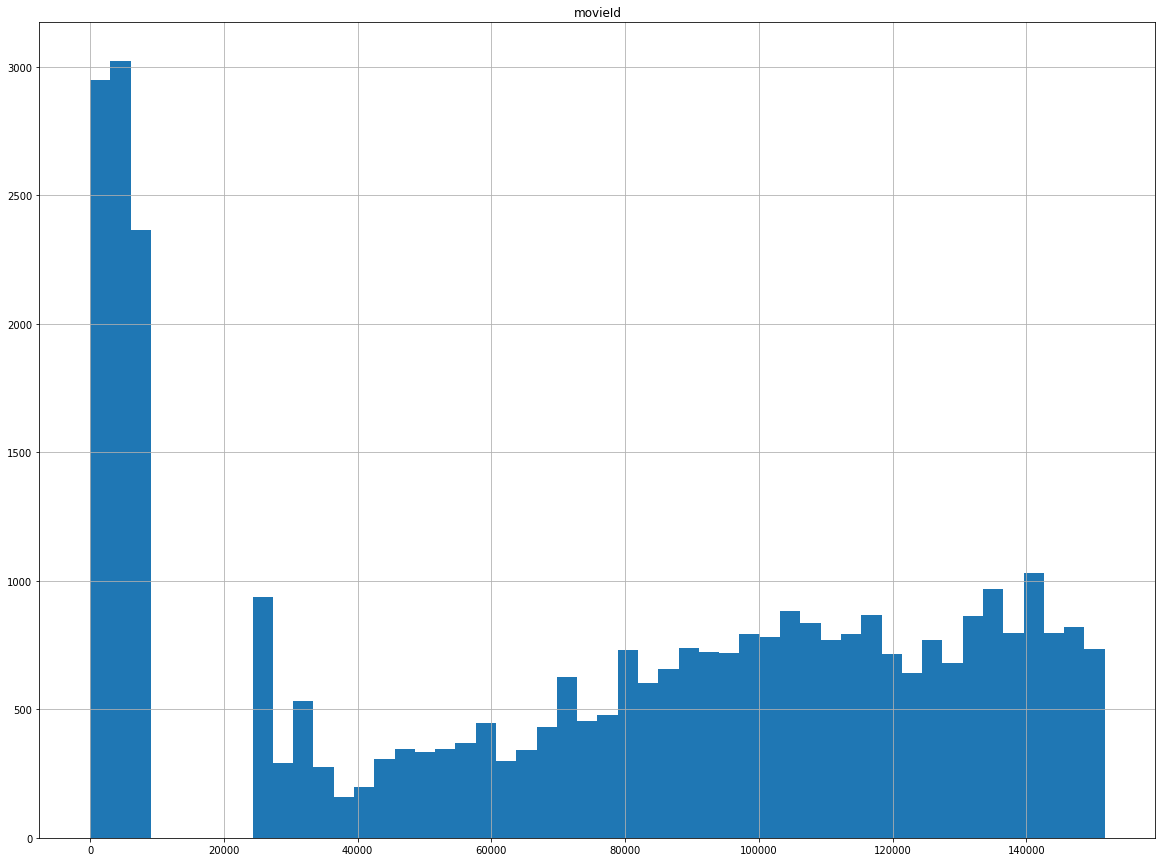

In [14]:
import matplotlib.pyplot as plt
movies_df.hist(bins = 50,figsize=(20,15))
plt.show()

In [18]:
movies_df.info

<bound method DataFrame.info of        movieId                                              title  genres  \
0            1                                          Toy Story     NaN   
1            2                                            Jumanji     NaN   
2            3                                   Grumpier Old Men     NaN   
3            4                                  Waiting to Exhale     NaN   
4            5                        Father of the Bride Part II     NaN   
5            6                                               Heat     NaN   
6            7                                            Sabrina     NaN   
7            8                                       Tom and Huck     NaN   
8            9                                       Sudden Death     NaN   
9           10                                          GoldenEye     NaN   
10          11                            American President, The     NaN   
11          12                        Dracul

In [52]:
movies_df.head()

,movieId,title,year
0,1,Toy Story,NaN
1,2,Jumanji,NaN
2,3,Grumpier Old Men,NaN
3,4,Waiting to Exhale,NaN
4,5,Father of the Bride Part II,NaN


In [54]:
movies_df.head()

,movieId,title,year
0,1,Toy Story,NaN
1,2,Jumanji,NaN
2,3,Grumpier Old Men,NaN
3,4,Waiting to Exhale,NaN
4,5,Father of the Bride Part II,NaN


In [15]:
ratings_df.head()

,userId,movieId,rating
0,1,169,2.5
1,1,2471,3.0
2,1,48516,5.0
3,2,2571,3.5
4,2,109487,4.0


In [56]:
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

,title,rating
0,"Breakfast Club, The",5.0
1,Toy Story,3.5
2,Jumanji,2.0
3,Pulp Fiction,5.0
4,Akira,4.5


In [57]:
inputId = movies_df[movies_df['title'].isin(inputMovies['title'].tolist())]
inputMovies = pd.merge(inputId, inputMovies)
inputMovies

,movieId,title,year,rating
0,1,Toy Story,NaN,3.5
1,2,Jumanji,NaN,2.0
2,296,Pulp Fiction,NaN,5.0
3,1274,Akira,NaN,4.5
4,1968,"Breakfast Club, The",NaN,5.0


In [59]:
userSubset = ratings_df[ratings_df['movieId'].isin(inputMovies['movieId'].tolist())]
userSubset.head()

,userId,movieId,rating
19,4,296,4.0
441,12,1968,3.0
479,13,2,2.0
531,13,1274,5.0
681,14,296,2.0


In [61]:
userSubsetGroup = userSubset.groupby(['userId'])

In [69]:
userSubsetGroup.get_group(1130)

,userId,movieId,rating
104167,1130,1,0.5
104168,1130,2,4.0
104214,1130,296,4.0
104363,1130,1274,4.5
104443,1130,1968,4.5


In [70]:
userSubsetGroup = sorted(userSubsetGroup, key=lambda x: len(x[1]), reverse=True)

In [73]:
userSubsetGroup[0:3]

[(75,       userId  movieId  rating
  7507      75        1     5.0
  7508      75        2     3.5
  7540      75      296     5.0
  7633      75     1274     4.5
  7673      75     1968     5.0), (106,       userId  movieId  rating
  9083     106        1     2.5
  9084     106        2     3.0
  9115     106      296     3.5
  9198     106     1274     3.0
  9238     106     1968     3.5), (686,        userId  movieId  rating
  61336     686        1     4.0
  61337     686        2     3.0
  61377     686      296     4.0
  61478     686     1274     4.0
  61569     686     1968     5.0)]

In [74]:
userSubsetGroup = userSubsetGroup[0:100]

In [81]:
pearsonCorrelationDict = {}

for name, group in userSubsetGroup:
    group = group.sort_values(by='movieId')
    inputMovies = inputMovies.sort_values(by='movieId')
    nRatings = len(group)
    temp_df = inputMovies[inputMovies['movieId'].isin(group['movieId'].tolist())]
    tempRatingList = temp_df['rating'].tolist()
    tempGroupList = group['rating'].tolist()
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0

    


In [82]:
pearsonCorrelationDict.items()

dict_items([(75, 0.8272781516947562), (106, 0.5860090386731182), (686, 0.8320502943378437), (815, 0.5765566601970551), (1040, 0.9434563530497265), (1130, 0.2891574659831201), (1502, 0.8770580193070299), (1599, 0.4385290096535153), (1625, 0.716114874039432), (1950, 0.179028718509858), (2065, 0.4385290096535153), (2128, 0.5860090386731196), (2432, 0.1386750490563073), (2791, 0.8770580193070299), (2839, 0.8204126541423674), (2948, -0.11720180773462392), (3025, 0.45124262819713973), (3040, 0.89514359254929), (3186, 0.6784622064861935), (3271, 0.26989594817970664), (3429, 0.0), (3734, -0.15041420939904673), (4099, 0.05860090386731196), (4208, 0.29417420270727607), (4282, -0.4385290096535115), (4292, 0.6564386345361464), (4415, -0.11183835382312353), (4586, -0.9024852563942795), (4725, -0.08006407690254357), (4818, 0.4885967564883424), (5104, 0.7674257668936507), (5165, -0.4385290096535153), (5547, 0.17200522903844556), (6082, -0.04728779924109591), (6207, 0.9615384615384616), (6366, 0.65779

In [84]:
personDF = pd.DataFrame.from_dict(pearsonCorrelationDict,orient='index')
personDF.columns= ['similarityIndex']
personDF['userId']=personDF.index
personDF.index= range(len(personDF))
personDF.head()

,similarityIndex,userId
0,0.827278,75
1,0.586009,106
2,0.832050,686
3,0.576557,815
4,0.943456,1040


In [86]:
topUsers=personDF.sort_values(by='similarityIndex',ascending=False)[0:50]
topUsers.head()

,similarityIndex,userId
64,0.961678,12325
34,0.961538,6207
55,0.961538,10707
67,0.960769,13053
4,0.943456,1040


In [94]:
topUserRating=topUsers.merge(ratings_df,left_on='userId',right_on='userId',how='inner')
topUserRating.head()

,similarityIndex,userId,movieId,rating
0,0.961678,12325,1,3.5
1,0.961678,12325,2,1.5
2,0.961678,12325,3,3.0
3,0.961678,12325,5,0.5
4,0.961678,12325,6,2.5


In [96]:
topUsersRating=topUsers.merge(ratings_df, left_on='userId', right_on='userId', how='inner')
topUsersRating.head()

,similarityIndex,userId,movieId,rating
0,0.961678,12325,1,3.5
1,0.961678,12325,2,1.5
2,0.961678,12325,3,3.0
3,0.961678,12325,5,0.5
4,0.961678,12325,6,2.5


In [97]:
#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

,similarityIndex,userId,movieId,rating,weightedRating
0,0.961678,12325,1,3.5,3.365874
1,0.961678,12325,2,1.5,1.442517
2,0.961678,12325,3,3.0,2.885035
3,0.961678,12325,5,0.5,0.480839
4,0.961678,12325,6,2.5,2.404196


In [98]:
#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
movieId,,
1,38.376281,140.800834
2,38.376281,96.656745
3,10.253981,27.254477
4,0.929294,2.787882
5,11.723262,27.151751


In [99]:
#Creates an empty dataframe
recommendation_df = pd.DataFrame()
#Now we take the weighted average
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index
recommendation_df.head()

,weighted average recommendation score,movieId
movieId,,
1,3.668955,1
2,2.518658,2
3,2.657941,3
4,3.000000,4
5,2.316058,5


In [100]:
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head(10)

,weighted average recommendation score,movieId
movieId,,
5073,5.0,5073
3329,5.0,3329
2284,5.0,2284
26801,5.0,26801
6776,5.0,6776
6672,5.0,6672
3759,5.0,3759
3769,5.0,3769
3775,5.0,3775


In [101]:
movies_df.loc[movies_df['movieId'].isin(recommendation_df.head(10)['movieId'].tolist())]

,movieId,title,year
2200,2284,Bandit Queen,NaN
3243,3329,"Year My Voice Broke, The",NaN
3669,3759,Fun and Fancy Free,NaN
3679,3769,Thunderbolt and Lightfoot,NaN
3685,3775,Make Mine Music,NaN
4978,5073,"Son's Room, The (Stanza del figlio, La)",NaN
6563,6672,War Photographer,NaN
6667,6776,Lagaan: Once Upon a Time in India,NaN
9064,26801,Dragon Inn (Sun lung moon hak chan),NaN
18106,90531,Shame,NaN


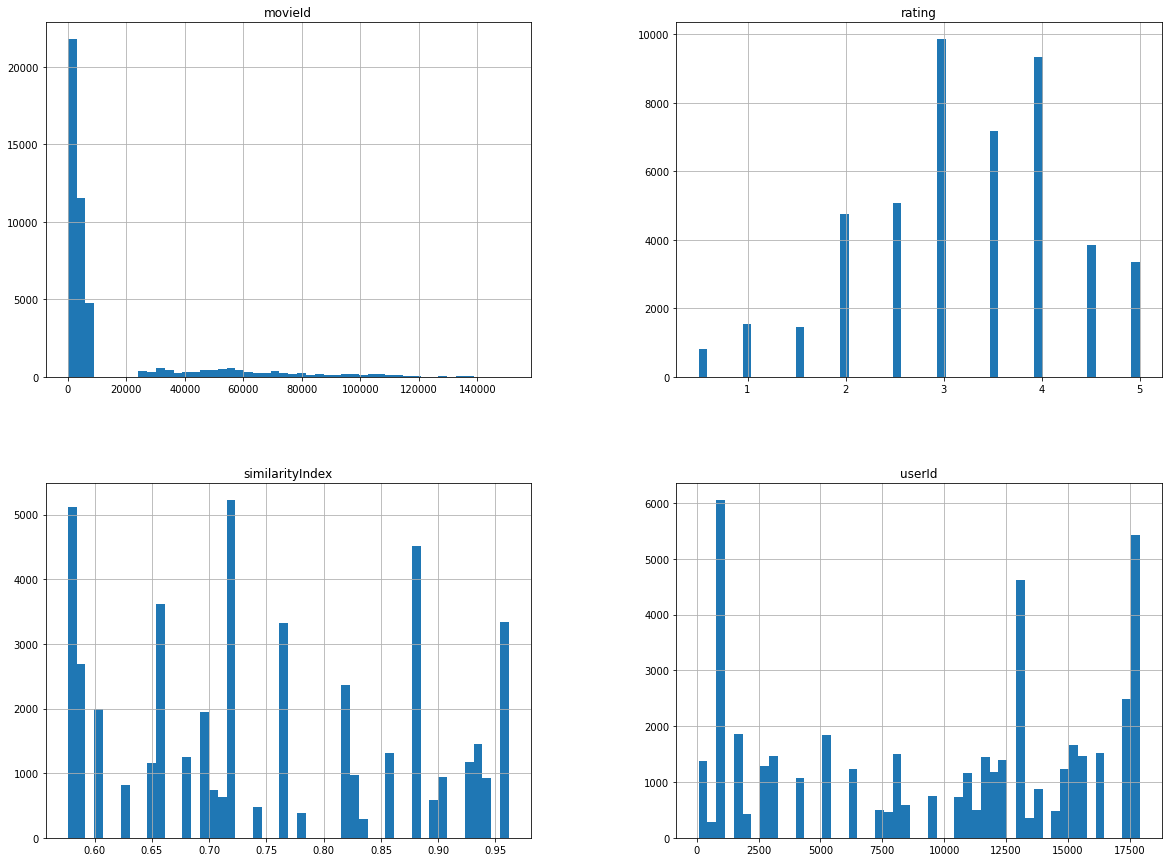

In [90]:
import matplotlib.pyplot as plt
topUserRating.hist(bins = 50,figsize=(20,15))
plt.show()

In [102]:
#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

,similarityIndex,userId,movieId,rating,weightedRating
0,0.961678,12325,1,3.5,3.365874
1,0.961678,12325,2,1.5,1.442517
2,0.961678,12325,3,3.0,2.885035
3,0.961678,12325,5,0.5,0.480839
4,0.961678,12325,6,2.5,2.404196
